In [2]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt


In [3]:
cnx = sqlite3.connect('output/results.db')
df = pd.read_sql_query("SELECT * FROM x_result", cnx)

In [4]:
#list of input forms (exact strings):
#t1c features
#t1c
#t1

#t2
#t2-features

#t1c-t2

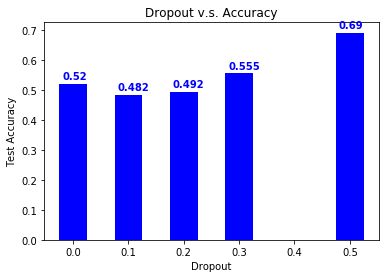

In [79]:
#generate dropout graph
d = {} #dict from dropout to (correct, total)
for idx, row in df.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    d[hypJson['dropout']] = (0, 0)
for idx, row in df.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    d[hypJson['dropout']] = (d[hypJson['dropout']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d[hypJson['dropout']][1] + len(row['test_labels'])) #total
for el in d.keys():
    d[el] = d[el][0]/d[el][1]
fig, ax = plt.subplots()    
width = 0.05 # the width of the bars 
ind = list(d.keys()) # the x locations for the groups
ax.bar(d.keys(), d.values(), width, color="blue")
plt.title('Dropout v.s. Accuracy')
plt.xlabel('Dropout')
plt.ylabel('Test Accuracy') 
for i, v in zip(ind, d.values()):
    ax.text(i-.02, v+.015, str(round(v, 3)), color='blue', fontweight='bold')

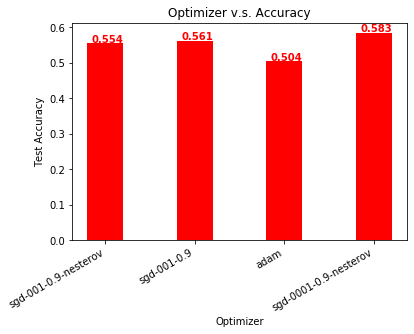

In [80]:
#generate optimizer graph
d = {} #dict from dropout to (correct, total)
for idx, row in df.iterrows():
#     correct, total = row['test_accuracy']
    hypJson = json.loads(row['hyperparameters'])
    d[hypJson['optimizer']] = (0, 0)
for idx, row in df.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    d[hypJson['optimizer']] = (d[hypJson['optimizer']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d[hypJson['optimizer']][1] + len(row['test_labels'])) #total
for el in d.keys():
    d[el] = d[el][0]/d[el][1]
fig, ax = plt.subplots()    
width = 0.4 # the width of the bars 
ax.bar(d.keys(), d.values(), width, color="red")
plt.title('Optimizer v.s. Accuracy')
plt.xlabel('Optimizer')
plt.ylabel('Test Accuracy') 
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for i, v in enumerate(d.values()):
    ax.text(i-.15, v+.003, str(round(v, 3)), color='red', fontweight='bold')

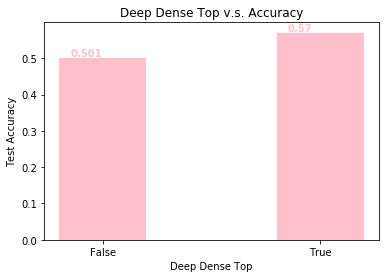

In [81]:
#generate deep-dense-top graph
d = {} #dict from dropout to (correct, total)
for idx, row in df.iterrows():
#     correct, total = row['test_accuracy']
    hypJson = json.loads(row['hyperparameters'])
    d[hypJson['deep-dense-top']] = (0, 0)
for idx, row in df.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    d[hypJson['deep-dense-top']] = (d[hypJson['deep-dense-top']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d[hypJson['deep-dense-top']][1] + len(row['test_labels'])) #total
for el in d.keys():
    d[el] = d[el][0]/d[el][1]
fig, ax = plt.subplots()    
width = 0.4 # the width of the bars 
ax.bar(['False', 'True'], d.values(), width, color="pink")
plt.title('Deep Dense Top v.s. Accuracy')
plt.xlabel('Deep Dense Top')
plt.ylabel('Test Accuracy') 
for i, v in enumerate(d.values()):
    ax.text(i-.15, v+.003, str(round(v, 3)), color='pink', fontweight='bold')

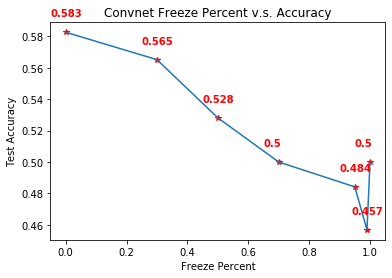

In [104]:
#generate convnet-freeze-percent graph
d = {} #dict from dropout to (correct, total)

for idx, row in df.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    d[hypJson['convnet-freeze-percent']] = (0, 0)
for idx, row in df.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    d[hypJson['convnet-freeze-percent']] = (d[hypJson['convnet-freeze-percent']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d[hypJson['convnet-freeze-percent']][1] + len(row['test_labels'])) #total
for el in d.keys():
    d[el] = d[el][0]/d[el][1]
fig, ax = plt.subplots()    
width = 0.1 # the width of the bars 
ind = sorted(d.keys()) # the x locations for the groups
plt.plot(ind, [d[a] for a in ind], 'r*')
plt.plot(ind, [d[a] for a in ind])
plt.title('Convnet Freeze Percent v.s. Accuracy')
plt.xlabel('Freeze Percent')
plt.ylabel('Test Accuracy')
for i in ind:
    ax.text(i-.05, d[i] + .01, str(round(d[i], 3)), color='red', fontweight='bold')